<a href="https://colab.research.google.com/github/IrinaDrachevskaia/Blog/blob/master/Space_Missions_Analysis_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 32.0 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import YearLocator, DateFormatter, MonthLocator

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

In [4]:
years = YearLocator()
months = MonthLocator()
years_fmt = DateFormatter('%Y-%m')

In [5]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [6]:
def get_country_code(country_name):
    try:
        country = countries.get(country_name)
        if country:
            return country.alpha3
        else:
            return None
    except Exception as e:
        return None

### Notebook Presentation

In [28]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [29]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? It's the table.
* How many rows and columns does it have? The table contains 9 columns and 4324 rows.
* What are the column names? Organisation,	Location,	Date,	Detail,	Rocket_Status,	Price and	Mission_Status.
* Are there any NaN values or duplicates? Yes, there are 3360 rows with NAN values

In [30]:
df_data.shape

(4324, 9)

In [31]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [32]:
df_data.isna().values.any()

True

In [33]:
df_data.isna().values.sum()

3360

In [34]:
df_data[df_data.isna().any(axis=1)]

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success
13,13,13,IAI,"Pad 1, Palmachim Airbase, Israel","Mon Jul 06, 2020 01:00 UTC",Shavit-2 | Ofek-16,StatusActive,NaN,Success
28,28,28,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Fri May 22, 2020 07:31 UTC",Soyuz 2.1b/Fregat-M | Cosmos 2546,StatusActive,NaN,Success
31,31,31,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Tue May 12, 2020 01:16 UTC",Kuaizhou 1A | Xingyun-2 01 (Wuhan) & 02,StatusActive,NaN,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [35]:
clean_df=df_data.dropna()
clean_df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis= 1 , inplace= True)
clean_df.shape

<ipython-input-35-5dc94ec10eb1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis= 1 , inplace= True)


(964, 7)

In [36]:
clean_df[clean_df.duplicated()]

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
793,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Wed Nov 05, 2008 00:15 UTC",Long March 2D | Shiyan-3 & Chuangxin-1(02),StatusActive,29.75,Success


In [37]:
clean_df=clean_df.drop_duplicates()

In [38]:
clean_df.shape

(963, 7)

Removing the comma in the column 'Price' to later change the data type to numeric

In [39]:
clean_df.Price = clean_df.Price.astype(str).str.replace(",", "")

## Descriptive Statistics

In [40]:
clean_df.dtypes

Organisation      object
Location          object
Date              object
Detail            object
Rocket_Status     object
Price             object
Mission_Status    object
dtype: object

In [41]:
clean_df.Price = pd.to_numeric(clean_df.Price)

In [42]:
clean_df.dtypes

Organisation       object
Location           object
Date               object
Detail             object
Rocket_Status      object
Price             float64
Mission_Status     object
dtype: object

In [43]:
clean_df.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


In [44]:
mission_count = clean_df.groupby('Mission_Status').count()
mission_count

,Organisation,Location,Date,Detail,Rocket_Status,Price
Mission_Status,,,,,,
Failure,36,36,36,36,36,36
Partial Failure,17,17,17,17,17,17
Prelaunch Failure,1,1,1,1,1,1
Success,909,909,909,909,909,909


According to this data, 910 missions were successful, 36 failed, 17 partially failed, and 1 prelaunch failed.

The most expensive missions:

In [45]:
clean_df.sort_values('Price', ascending=False).head(5)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
1916,RVSN USSR,"Site 110/37, Baikonur Cosmodrome, Kazakhstan","Tue Nov 15, 1988 03:00 UTC",Energiya/Buran | Buran,StatusRetired,"5,000.00",Success
2000,RVSN USSR,"Site 250, Baikonur Cosmodrome, Kazakhstan","Fri May 15, 1987 17:30 UTC",Energiya/Polyus | Polyus Space Station,StatusRetired,"5,000.00",Success
3545,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Wed Jul 16, 1969 13:32 UTC",Saturn V | Apollo 11,StatusRetired,"1,160.00",Success
3603,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sat Dec 21, 1968 12:51 UTC",Saturn V | Apollo 8,StatusRetired,"1,160.00",Success
3475,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sat Apr 11, 1970 19:13 UTC",Saturn V | Apollo 13,StatusRetired,"1,160.00",Success


The cheapest missions:

In [46]:
clean_df.sort_values('Price').head(10)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
102,CASC,"Site 95, Jiuquan Satellite Launch Center, China","Thu Sep 19, 2019 06:42 UTC",Long March 11 | Zhuhai-1 Group 03,StatusActive,5.30,Success
281,CASC,"Site 95, Jiuquan Satellite Launch Center, China","Fri Jan 19, 2018 04:12 UTC","Long March 11 | Jilin-1 07, 08 & Others",StatusActive,5.30,Success
176,CASC,"Site 95, Jiuquan Satellite Launch Center, China","Fri Dec 21, 2018 23:51 UTC",Long March 11 | Hongyun-1,StatusActive,5.30,Success
399,CASC,"Site 95, Jiuquan Satellite Launch Center, China","Wed Nov 09, 2016 23:42 UTC","Long March 11 | XPNAV 1, Xiaoxiang 1 & Others",StatusActive,5.30,Success
487,CASC,"Site 95, Jiuquan Satellite Launch Center, China","Fri Sep 25, 2015",Long March 11 | Pujian 1 & Others,StatusActive,5.30,Success
166,CASC,"Site 95, Jiuquan Satellite Launch Center, China","Mon Jan 21, 2019 05:42 UTC",Long March 11 | Jilin-1 Hyperspectral & Others,StatusActive,5.30,Success
26,CASC,"Xichang Satellite Launch Center, China","Fri May 29, 2020 20:13 UTC",Long March 11 | XJS-G and XJS-H,StatusActive,5.30,Success
133,CASC,"Tai Rui Barge, Yellow Sea","Wed Jun 05, 2019 04:06 UTC",Long March 11H | Jilin-1 & Others,StatusActive,5.30,Success
249,CASC,"Site 95, Jiuquan Satellite Launch Center, China","Thu Apr 26, 2018 04:42 UTC",Long March 11 | Zhuhai-1 2A to 2D,StatusActive,5.30,Success
800,SpaceX,"Omelek Island, Ronald Reagan Ballistic Missile...","Sun Sep 28, 2008 23:15 UTC",Falcon 1 | RatSat,StatusRetired,7.00,Success


`The most expensive mission costs $5 billion, while the cheapest one costs $5.30 million`





# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [47]:
org_missions = clean_df.Organisation.value_counts()
org_missions.head(5)

CASC           157
NASA           149
SpaceX          99
ULA             98
Arianespace     96
Name: Organisation, dtype: int64

<BarContainer object of 25 artists>

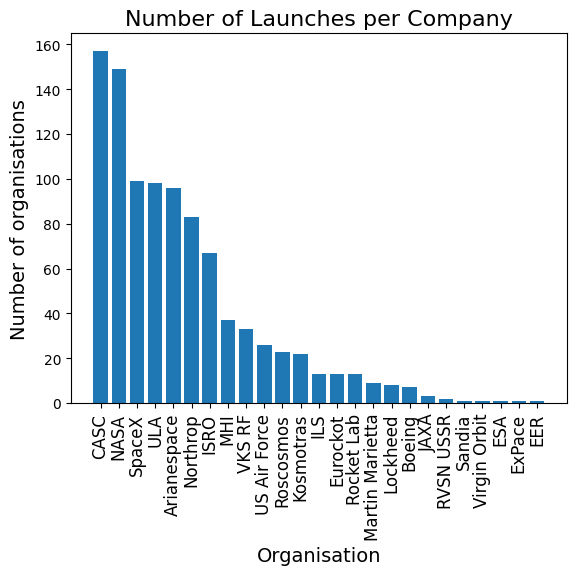

In [48]:
plt.xticks(fontsize=12, rotation=90)
plt.xlabel('Organisation', fontsize=14)
plt.ylabel('Number of organisations', fontsize=14)
plt.title('Number of Launches per Company', fontsize=16)
plt.bar(org_missions.index, org_missions.values)

We can see that CASC has the largest number of launches.

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [49]:
act_ret_rockets = clean_df.Rocket_Status.value_counts()
act_ret_rockets

StatusActive     585
StatusRetired    378
Name: Rocket_Status, dtype: int64

<BarContainer object of 2 artists>

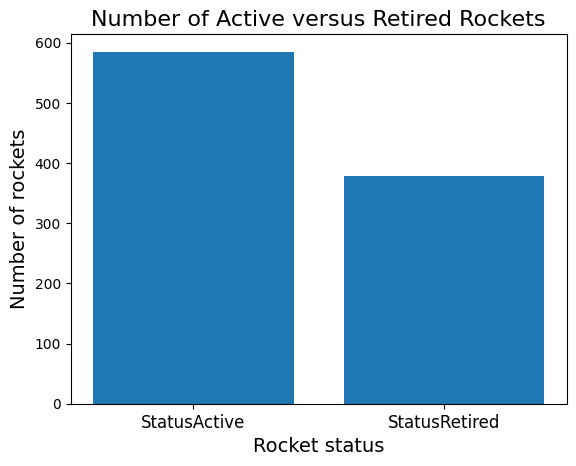

In [50]:
plt.xticks(fontsize=12)
plt.xlabel('Rocket status', fontsize=14)
plt.ylabel('Number of rockets', fontsize=14)
plt.title('Number of Active versus Retired Rockets', fontsize=16)
plt.bar(act_ret_rockets.index, act_ret_rockets.values)

In [51]:
rockets_per_org = clean_df.groupby(['Organisation', 'Rocket_Status'], as_index=False).agg({'Detail': pd.Series.count})
rockets_per_org.tail(5)

,Organisation,Rocket_Status,Detail
28,ULA,StatusRetired,12
29,US Air Force,StatusRetired,26
30,VKS RF,StatusActive,15
31,VKS RF,StatusRetired,18
32,Virgin Orbit,StatusActive,1


In [52]:
bar = px.bar(
    x=rockets_per_org.Organisation,
    color=rockets_per_org.Rocket_Status,
    y=rockets_per_org.Detail,
    title='Number of Active versus Retired Rockets per Company',
    barmode="group"
)
bar.update_layout(xaxis_title='Organisation',
                  yaxis_title='Number of Rockets',
                  xaxis={'categoryorder':'total descending'},
                  yaxis=dict(type='log'))

bar.show()

We can see that there are more active rockets than retired ones. Additionally, you can observe the number of activated and retired rockets for each organisation. According to this bar chart, some organizations have only active rockets, while others have only retired rockets.

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [53]:
mission_status = clean_df.Mission_Status.value_counts()
mission_status

Success              909
Failure               36
Partial Failure       17
Prelaunch Failure      1
Name: Mission_Status, dtype: int64

<BarContainer object of 4 artists>

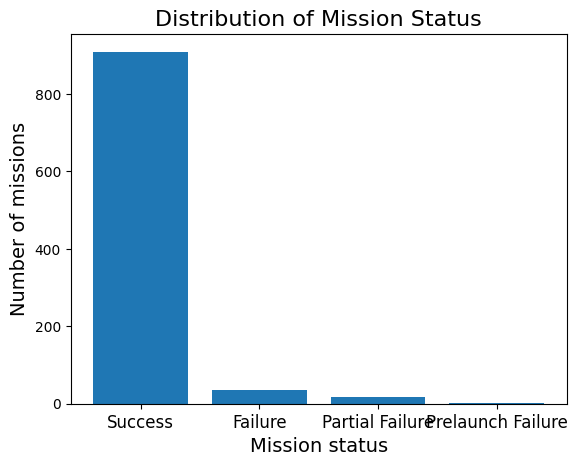

In [54]:
plt.xticks(fontsize=12)
plt.xlabel('Mission status', fontsize=14)
plt.ylabel('Number of missions', fontsize=14)
plt.title('Distribution of Mission Status', fontsize=16)
plt.bar(mission_status.index, mission_status.values)

In [55]:
mission_status_per_company = clean_df.groupby(['Organisation', 'Mission_Status'], as_index=False).agg({'Detail': pd.Series.count})

In [56]:
bar = px.bar(
    x=mission_status_per_company.Organisation,
    color=mission_status_per_company.Mission_Status,
    y=mission_status_per_company.Detail,
    title='Distribution of Mission Status per Company',
    barmode="group"
)
bar.update_layout(xaxis_title='Organisation',
                  yaxis_title='Number of Rockets',
                  xaxis={'categoryorder':'total descending'},
                  yaxis=dict(type='log'))

bar.show()

In [57]:
clean_df['Mission_Type'] = clean_df['Mission_Status'].apply(lambda x: 'Success' if x == 'Success' else 'All Others')
successful_missions = mission_status_per_company = clean_df.groupby(['Organisation', 'Mission_Type'], as_index=False).agg({'Mission_Status': pd.Series.count})

In [58]:
bar = px.bar(
    x=successful_missions.Organisation,
    color=successful_missions.Mission_Type,
    y=successful_missions.Mission_Status,
    title='Success and failed missions per Company',
    barmode="group"
)
bar.update_layout(xaxis_title='Organisation',
                  yaxis_title='Number of Rockets',
                  xaxis={'categoryorder':'total descending'},
                  yaxis=dict(type='log'))

bar.show()

There are more successful missions than failed missions overall. The organization CASC has the largest number of successful missions, while the organization Northrop has the largest number of failed missions. Some organizations, such as Virgin Orbit, Sandia, ExPace, and EER, have only experienced failed missions. On the other hand, a few organizations, including MHI, ILS, Lockheed, JAXA, RVSN USSR, and ESA, have exclusively achieved successful missions.

# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

# Average mission price per Company

In [59]:
av_price = clean_df.groupby('Organisation').mean().sort_values('Price', ascending=False)

<ipython-input-59-7ead4c630357>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [60]:
bar_price = px.bar(
    x = av_price.index,
    y = av_price.Price,
    title = 'The average mission cost',
    hover_name=av_price.index,
    color=av_price.Price,
    color_continuous_scale='Agsunset'
)
bar_price.update_layout(
    xaxis_title = 'Organisation',
    yaxis_title = 'Average price, USD millions',
    coloraxis_showscale=False
)
bar_price.show()

In [61]:
total_prices = clean_df.groupby('Organisation').sum().sort_values('Price', ascending=False)

<ipython-input-61-b03968a9e872>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [62]:
bar_total_price = px.bar(
    x = total_prices.index,
    y = total_prices.Price,
    title = 'Total mission cost',
    hover_name=total_prices.index,
    color=total_prices.Price,
    color_continuous_scale='Agsunset'
)
bar_total_price.update_layout(
    xaxis_title = 'Organisation',
    yaxis_title = 'total price, USD millions',
    coloraxis_showscale=False
)
bar_total_price.show()

In [63]:
box_prices = px.box(clean_df, x='Organisation', y='Price', title='How Expensive are the Launches per Company?')
box_prices.update_layout(xaxis_title='Organisations',
                  yaxis_title='Prices, USD millions',
                  xaxis={'categoryorder':'min ascending'}, #отсортировать значения по возрастанию в категории xaxis/ Sort values in the x-axis category in ascending order
    yaxis=dict(type='log'))
box_prices.show()

The organisation RVSN USSR has the highest average mission cost, while NASA has the highest total mission cost. The organisations CASC and SpaceX have the least expensive missions. Rocket Lab has the lowest average costs and Virgin Orbit has the least total costs.

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [64]:
clean_df.head(3)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Mission_Type
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Success


In [65]:
clean_df['Country'] = clean_df['Location'].str.split(',').str[-1].str.strip()
clean_df.head(3)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Mission_Type,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,Success,China
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Success,Kazakhstan


Russia is the Russian Federation
New Mexico should be USA
Yellow Sea refers to China
Shahrud Missile Test Site should be Iran
Pacific Missile Range Facility should be USA
Barents Sea should be Russian Federation
Gran Canaria should be USA

In [66]:
clean_df.Country = clean_df.Country.astype(str).str.replace("Russia", "Russian Federation")
clean_df.Country = clean_df.Country.astype(str).str.replace("New Mexico", "USA")
clean_df.Country = clean_df.Country.astype(str).str.replace("Yellow Sea", "China")
clean_df.Country = clean_df.Country.astype(str).str.replace("Shahrud Missile Test Site", "Iran")
clean_df.Country = clean_df.Country.astype(str).str.replace("Pacific Missile Range Facility", "USA")
clean_df.Country = clean_df.Country.astype(str).str.replace("Barents Sea", "Russian Federation")
clean_df.Country = clean_df.Country.astype(str).str.replace("Gran Canaria", "USA")

In [67]:
clean_df['Country_Code'] = clean_df['Country'].apply(get_country_code)

In [68]:
clean_df[clean_df.Country_Code == 'USA']

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Mission_Type,Country,Country_Code
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,Success,USA,USA
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,Success,USA,USA
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.00,Success,Success,USA,USA
10,Northrop,"LP-0B, Wallops Flight Facility, Virginia, USA","Wed Jul 15, 2020 13:46 UTC",Minotaur IV | NROL-129,StatusActive,46.00,Success,Success,USA,USA
17,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Tue Jun 30, 2020 20:10 UTC",Falcon 9 Block 5 | GPS III SV03,StatusActive,50.00,Success,Success,USA,USA
...,...,...,...,...,...,...,...,...,...,...
3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.00,Success,Success,USA,USA
3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success,Success,USA,USA
3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success,Success,USA,USA
4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success,Success,USA,USA


In [69]:
clean_df.head(10)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Mission_Type,Country,Country_Code
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,Success,China,CHN
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Success,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,Success,USA,USA
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,Success,China,CHN
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a | Progress MS-15,StatusActive,48.50,Success,Success,Kazakhstan,KAZ
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.00,Success,Success,USA,USA
9,JAXA,"LA-Y1, Tanegashima Space Center, Japan","Sun Jul 19, 2020 21:58 UTC",H-IIA 202 | Hope Mars Mission,StatusActive,90.00,Success,Success,Japan,JPN
10,Northrop,"LP-0B, Wallops Flight Facility, Virginia, USA","Wed Jul 15, 2020 13:46 UTC",Minotaur IV | NROL-129,StatusActive,46.00,Success,Success,USA,USA
11,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Fri Jul 10, 2020 04:17 UTC","Kuaizhou 11 | Jilin-1 02E, CentiSpace-1 S2",StatusActive,28.30,Failure,All Others,China,CHN


In [70]:
num_launches_by_country = clean_df.groupby(['Country', 'Country_Code'], as_index=False).agg({'Rocket_Status': pd.Series.count})
num_launches_by_country = num_launches_by_country.sort_values(by='Rocket_Status')

In [71]:
num_launches_by_country.rename(columns = {'Rocket_Status': 'Launches_number'}, inplace = True)

In [72]:
num_launches_by_country.head()

,Country,Country_Code,Launches_number
5,New Zealand,NZL,13
3,Japan,JPN,40
4,Kazakhstan,KAZ,46
6,Russian Federation,RUS,54
2,India,IND,67


In [73]:
map = px.choropleth(num_launches_by_country,
                    locations="Country_Code",
                    color="Launches_number", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale="Sunset")
map.update_layout(coloraxis_showscale=True,
                  title="Number of Launches by Country")
map.show()

In the map, it can be seen that the highest number of launches occurred in the USA.

# Use a Choropleth Map to Show the Number of Failures by Country


In [74]:
failures_by_country = clean_df.groupby(['Country', 'Country_Code', 'Mission_Type'], as_index=False).agg({'Mission_Status': pd.Series.count})
failures_by_country = failures_by_country[failures_by_country.Mission_Type == 'All Others']
failures_by_country.head(3)

,Country,Country_Code,Mission_Type,Mission_Status
0,China,CHN,All Others,7
2,France,FRA,All Others,3
4,India,IND,All Others,8


In [75]:
faileures_map = px.choropleth(failures_by_country,
                    locations="Country_Code",
                    color="Mission_Status",
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale="Sunset")
faileures_map.update_layout(coloraxis_showscale=True,
                  title="The Number of Failures by Country")
faileures_map.show()

On the map, it can be observed that the highest number of launch failures, including partial failures and prelaunch failures, took place in the USA.

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [76]:
missions_per_country_org = clean_df.groupby(['Country', 'Organisation', 'Mission_Status'], as_index=False).agg({'Mission_Type': pd.Series.count})
missions_per_country_org.head(5)

,Country,Organisation,Mission_Status,Mission_Type
0,China,CASC,Failure,3
1,China,CASC,Partial Failure,3
2,China,CASC,Success,151
3,China,ExPace,Failure,1
4,France,Arianespace,Failure,2


In [77]:
mission_fig = px.sunburst(missions_per_country_org,
                      path=['Country', 'Organisation', 'Mission_Status'],
                      values='Mission_Type',
                      title='Missions by Country and Organisation')
mission_fig.show()

On the chart, you can see that the USA has the largest number of launches, including successful launches, in common. However, the organization CASC (China) has the highest number of successful launches.
The Sunburst Chart visually represents the share of all types of launches for each country and organization in the total number of launches.

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

Above, we already created a Bar chart showing the total expenses for the entire organization. Now, we will construct a Sunburst Chart of expenses for each country and organization.

In [78]:
total_prices = clean_df.groupby('Organisation').sum().sort_values('Price', ascending=False)

<ipython-input-78-b03968a9e872>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [79]:
bar_total_price = px.bar(
    x = total_prices.index,
    y = total_prices.Price,
    title = 'Total mission cost',
    hover_name=total_prices.index,
    color=total_prices.Price,
    color_continuous_scale='Agsunset'
)
bar_total_price.update_layout(
    xaxis_title = 'Organisation',
    yaxis_title = 'total price, USD millions',
    coloraxis_showscale=False
)
bar_total_price.show()

In [80]:
mission_cost_per_country_org = clean_df.groupby(['Country', 'Organisation', 'Mission_Status'], as_index=False).sum({'Price': pd.Series.count})
mission_cost_per_country_org.head(3)

,Country,Organisation,Mission_Status,Price
0,China,CASC,Failure,158.51
1,China,CASC,Partial Failure,128.60
2,China,CASC,Success,"6,023.40"


In [81]:
cost_fig = px.sunburst(mission_cost_per_country_org,
                      path=['Country', 'Organisation', 'Mission_Status'],
                      values='Price',
                      title='Mission Costs by Country, Organisation and Mission Status')
cost_fig.show()

All these charts indicate that NASA has the highest total prices. Additionally, we can observe that NASA has the highest number of launches.

# Analyse the Amount of Money Spent by Organisation per Launch

To analyse the cost of each organization's launches, we can use the actual values but with a selection. Since the table contains data for more than 900 launches, it's not feasible to display them all in a single histogram. Alternatively, we can calculate the average launch cost for each organization, as we did earlier. To begin with, let's select the top 30 organizations with the highest expenses and identify the most expensive launch.

In [82]:
cut_df_price = clean_df.sort_values('Price', ascending=False).head(30)
cut_df_price.shape

(30, 10)

In [83]:
bar_price_org = px.bar(
    x = cut_df_price.Detail,
    y = cut_df_price.Price,
    title = 'Mission cost',
    hover_name=cut_df_price.Price,
    color=cut_df_price.Organisation,
    color_continuous_scale='Agsunset'
)
bar_price_org.update_layout(
    xaxis_title = 'Mission',
    yaxis_title = 'Price, USD millions',
    coloraxis_showscale=False
)
bar_price_org.show()

In [84]:
cost_fig_mission = px.sunburst(cut_df_price,
                      path=['Country', 'Organisation', 'Mission_Status', 'Detail'],
                      values='Price',
                      title='Mission Costs by Country, Organisation and Mission Status')
cost_fig_mission.show()

If we recall that according to the average cost per mission (Check the section 'How Expensive are the Launches?'), Company RVSN USSR has the highest cost, and according to the natural cost per mission, Company RVSN USSR also has the highest cost. And it was a successful mission.

We can also check how the price per mission for every organization has been changing over time

In [86]:
clean_df.dtypes

Organisation              object
Location                  object
Date              datetime64[ns]
Detail                    object
Rocket_Status             object
Price                    float64
Mission_Status            object
Mission_Type              object
Country                   object
Country_Code              object
dtype: object

In [87]:
clean_df['Date'] = pd.to_datetime(clean_df['Date'], utc=True).dt.tz_convert(None)

In [88]:
clean_df['Date'] = pd.to_datetime(clean_df['Date'], dayfirst=True)
clean_df = clean_df.sort_values('Date')
clean_df.head(5)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Mission_Type,Country,Country_Code
4020,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1964-09-01 15:00:00,Titan IIIA | Transtage 1,StatusRetired,63.23,Failure,All Others,USA,USA
4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1964-12-10 16:52:00,Titan IIIA | Transtage 2,StatusRetired,63.23,Success,Success,USA,USA
3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1965-02-11 15:19:00,Titan IIIA | LES 1,StatusRetired,63.23,Success,Success,USA,USA
3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1965-05-06 15:00:00,Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success,Success,USA,USA
3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA",1966-07-29 18:43:00,Titan IIIB | KH-8,StatusRetired,59.00,Success,Success,USA,USA


In [89]:
plt.figure(figsize=(16, 10))

line = px.line(clean_df, x="Date", y="Price", color='Organisation', hover_name='Country', title='Mission costs by Company over time')
line.update_layout(xaxis_title='Date', yaxis_title='million $')
line.show()

<Figure size 1600x1000 with 0 Axes>

As you can see, there is no direct correlation between time and cost. We can only observe that the US Air Force conducted the initial launches. NASA began conducting launches next, followed by all the others. The RVSN USSR organization conducted only 2 launches.

# Chart the Number of Launches per Year

In [90]:
clean_df.shape

(963, 10)

In [91]:
clean_df['Year'] = pd.to_datetime(clean_df['Date']).dt.year

In [92]:
launches_per_year = clean_df.groupby('Year').agg({'Detail': pd.Series.nunique})
launches_per_year.head(7)

,Detail
Year,
1964,2
1965,2
1966,3
1967,8
1968,10
1969,8
1970,1


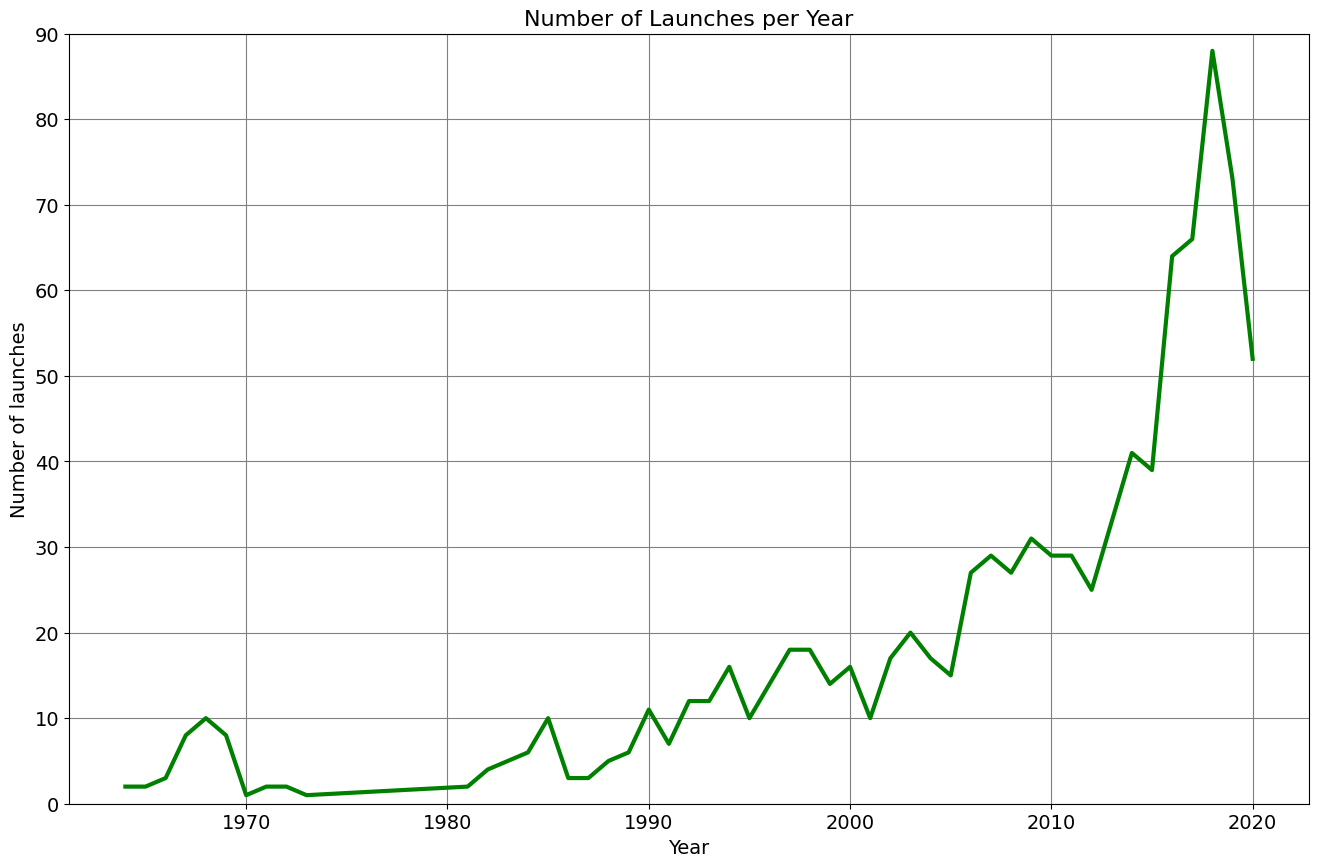

In [93]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of launches', fontsize=14)
plt.ylim(0, 90)
plt.title('Number of Launches per Year', fontsize=16)
plt.grid(color='grey')
plt.plot(launches_per_year.index, launches_per_year.values, linewidth=3, c='green')

The year with the largest number of launches was 2018, with a total of 88 launches.

In [94]:
launches_per_year_by_company = clean_df.groupby(['Year', 'Organisation', 'Country'], as_index=False).agg({'Detail': pd.Series.nunique})
launches_per_year_by_company.head(7)

,Year,Organisation,Country,Detail
0,1964,US Air Force,USA,2
1,1965,US Air Force,USA,2
2,1966,US Air Force,USA,3
3,1967,NASA,USA,1
4,1967,US Air Force,USA,7
5,1968,NASA,USA,2
6,1968,US Air Force,USA,8


In [95]:
plt.figure(figsize=(16, 10))

line = px.line(launches_per_year_by_company, x="Year", y="Detail", color='Organisation', hover_name='Country', title='Number of launches by Company')
line.update_layout(xaxis_title='Year', yaxis_title='Number of Launches')
line.show()

<Figure size 1600x1000 with 0 Axes>

The organization CASC had the highest number of launches in 2018, totaling 27 launches.

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [96]:
clean_df['Month'] = clean_df['Date'].dt.to_period('M')
launches_per_month= clean_df.groupby('Month', as_index=False).agg({'Detail': pd.Series.nunique})
launches_per_month['Month'] = pd.to_datetime(launches_per_month['Month'].astype(str), format='%Y-%m')
launches_per_month.dtypes

Month     datetime64[ns]
Detail             int64
dtype: object

In [97]:
launches_per_month[launches_per_month.Detail == max(launches_per_month.Detail)]

,Month,Detail
349,2017-06-01,12
386,2020-07-01,12


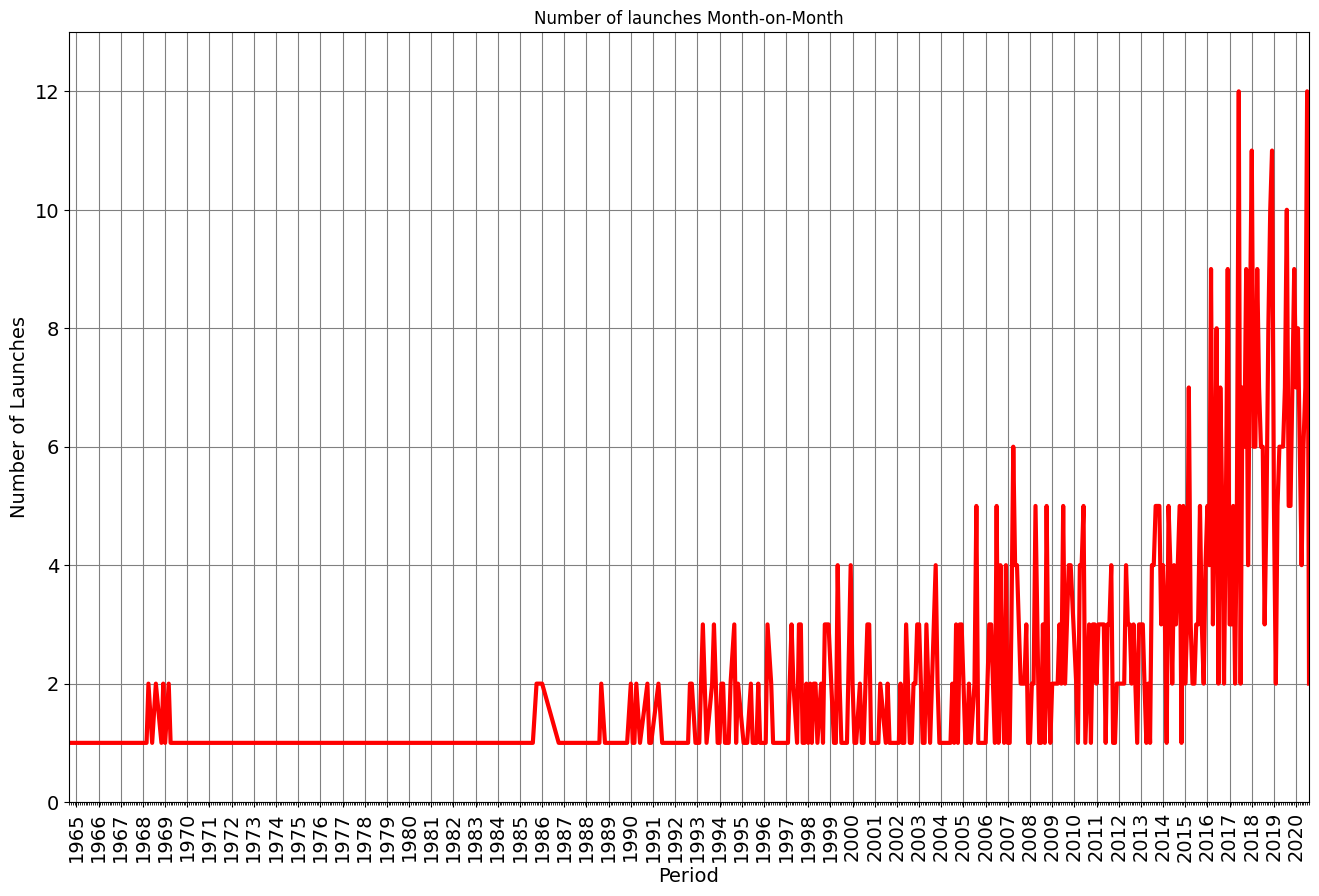

In [98]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_minor_locator(months)
plt.xlabel('Period', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)
plt.ylim(0, 13)
plt.xlim(min(launches_per_month.Month), max(launches_per_month.Month))
plt.title('Number of launches Month-on-Month')
plt.grid(color='grey')
plt.plot(launches_per_month.Month, launches_per_month.Detail, linewidth=3, c='red')

The most popular launch periods are June 2017 and July 2020.

In [99]:
clean_df['Date'] = clean_df['Date'].dt.to_period('D')

<ipython-input-100-be8fff8ff996>:1: FutureWarning:

Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Month'], dtype='object')



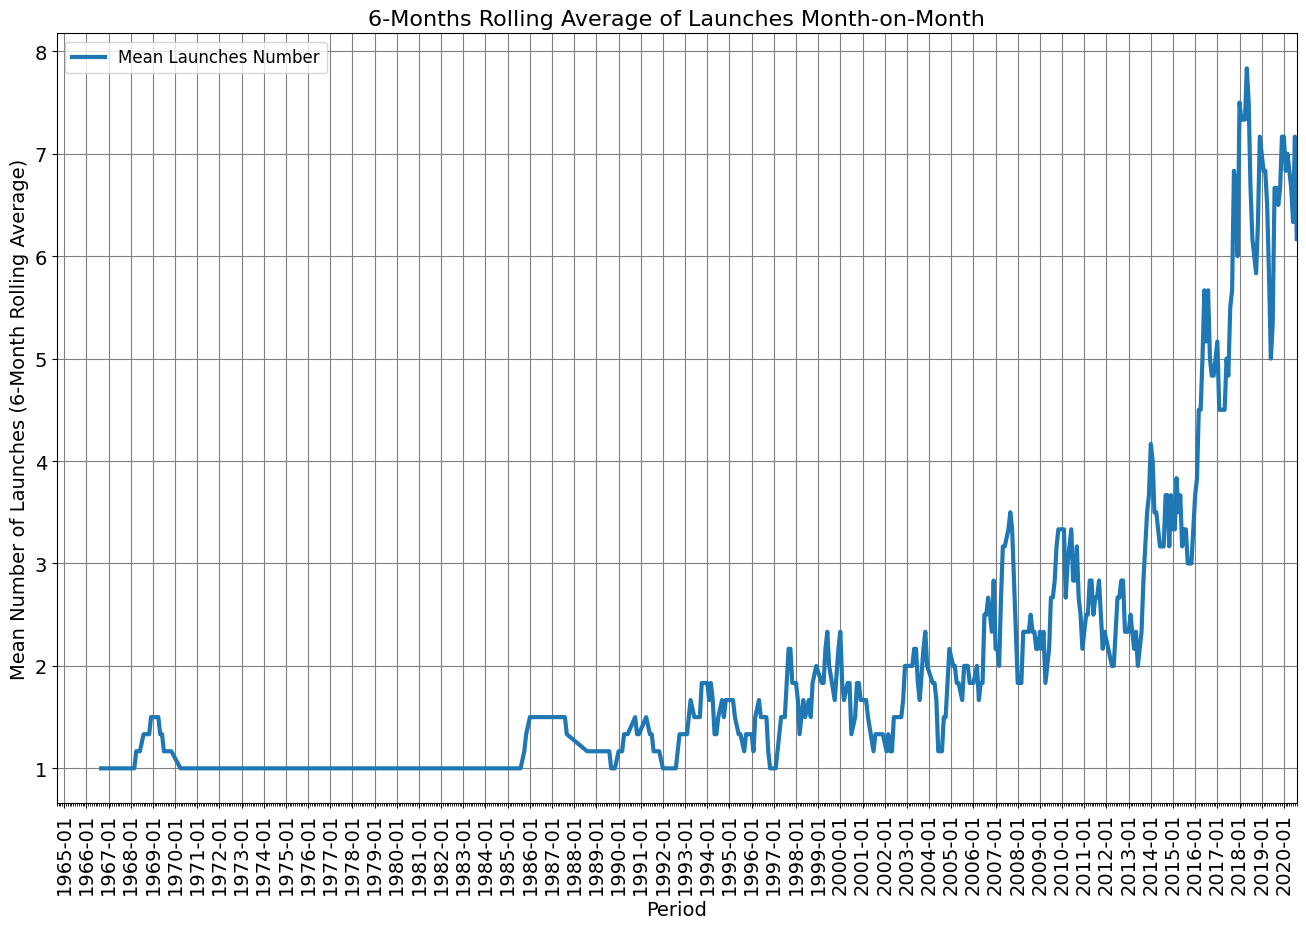

In [100]:
roll_df_launches = launches_per_month.rolling(window=6).mean()

plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.xlabel('Period', fontsize=14)
plt.xlim(min(launches_per_month.Month), max(launches_per_month.Month))
plt.ylabel('Mean Number of Launches (6-Month Rolling Average)', fontsize=14)
plt.title('6-Months Rolling Average of Launches Month-on-Month', fontsize=16)
plt.grid(color='grey')

for column in roll_df_launches.columns:
    plt.plot(launches_per_month.Month, roll_df_launches[column], linewidth=3, label='Mean Launches Number')

plt.gca().xaxis.set_major_locator(years)
date_format = DateFormatter('%Y-%m')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_minor_locator(months)

plt.legend(fontsize=12)
plt.show()

In [101]:
launches_per_month_by_company = clean_df.groupby(['Month', 'Organisation', 'Country'], as_index=False).agg({'Detail': pd.Series.nunique})
launches_per_month_by_company['Month'] = pd.to_datetime(launches_per_month_by_company['Month'].astype(str), format='%Y-%m')
launches_per_month_by_company[launches_per_month_by_company.Detail == max(launches_per_month_by_company.Detail)]

,Month,Organisation,Country,Detail
614,2016-08-01,CASC,China,4
679,2017-12-01,CASC,China,4
684,2018-01-01,CASC,China,4
826,2020-07-01,CASC,China,4


In [102]:
plt.figure(figsize=(16, 10))
line = px.line(launches_per_month_by_company, x="Month", y="Detail", color='Organisation', hover_name='Country', title='Number of launches Month-on-Month by Company')
line.update_layout(xaxis_title='Period', yaxis_title='Number of Launches')
line.show()

<Figure size 1600x1000 with 0 Axes>

According to this data, the summer months are the most popular for launches.

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

Let's take a look at the dynamics of 2020. At the same time, we'll examine which months are the most popular and which are not.

In [103]:
df2020 = clean_df[clean_df.Year == 2020]

In [104]:
launches2020 = df2020.groupby('Month', as_index=False).agg({'Detail': pd.Series.nunique})
launches2020['Month'] = launches2020['Month'].dt.strftime('%B')
launches2020.head(12)

,Month,Detail
0,January,7
1,February,8
2,March,6
3,April,4
4,May,6
5,June,7
6,July,12
7,August,2


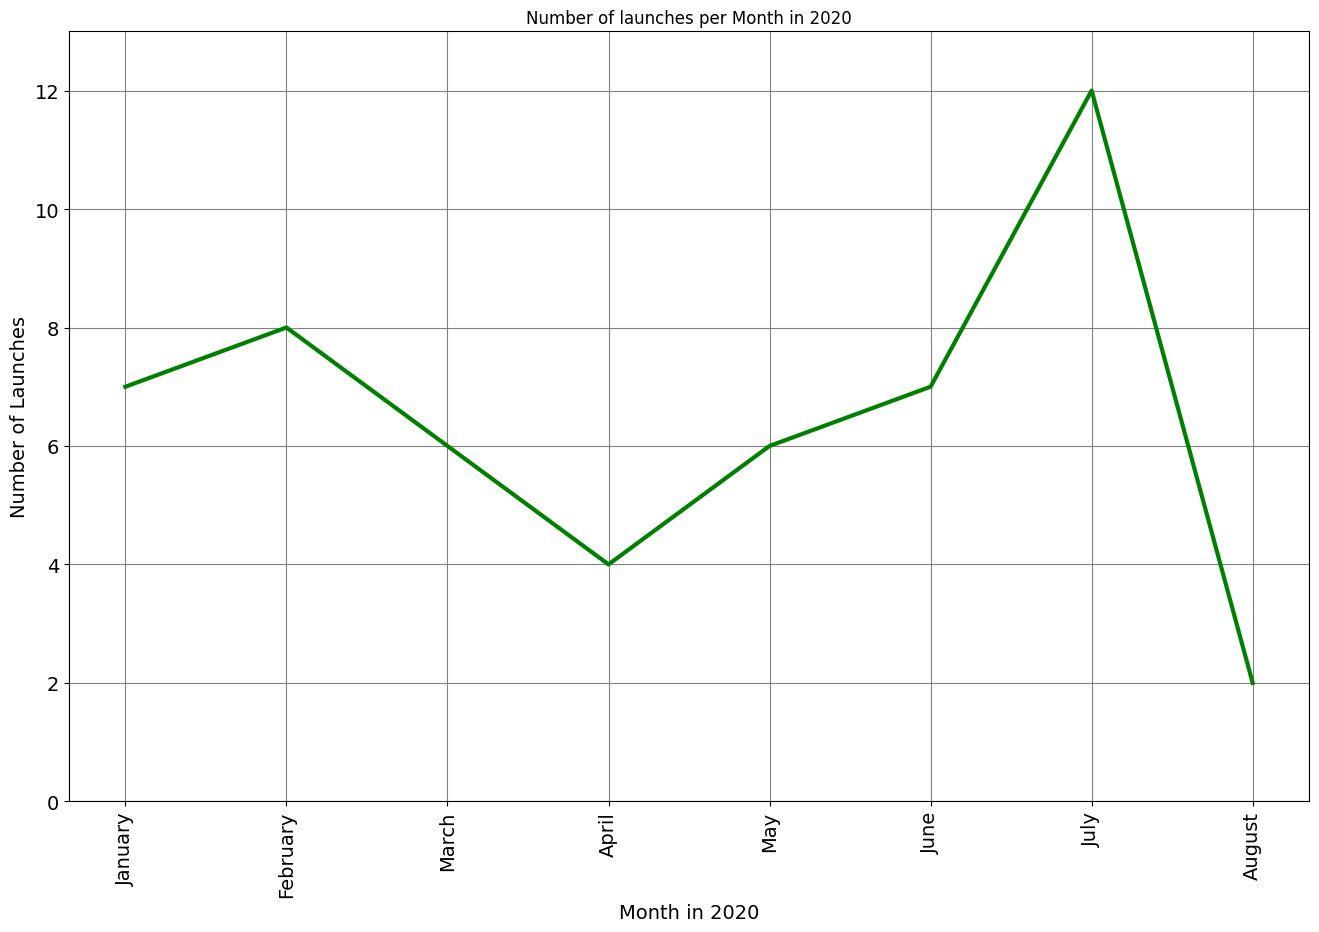

In [105]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)

plt.xlabel('Month in 2020', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)
plt.ylim(0, 13)
plt.title('Number of launches per Month in 2020')
plt.grid(color='grey')
plt.plot(launches2020.Month, launches2020.Detail, linewidth=3, c='green')

In [106]:
launches2020_country = df2020.groupby(['Month','Country'], as_index=False).agg({'Detail': pd.Series.nunique})
launches2020_country['Month'] = launches2020_country['Month'].dt.strftime('%B')
launches2020_country.head(12)

,Month,Country,Detail
0,January,China,2
1,January,France,1
2,January,New Zealand,1
3,January,USA,3
4,February,China,1
5,February,France,1
6,February,Japan,1
7,February,Kazakhstan,1
8,February,Russian Federation,1
9,February,USA,3


In [107]:
plt.figure(figsize=(16, 10))
line = px.line(launches2020_country, x="Month", y="Detail", color='Country', hover_name='Country', title='Number of launches per Country in 2020')
line.update_layout(xaxis_title='Month', yaxis_title='Number of Launches')
line.show()

<Figure size 1600x1000 with 0 Axes>

In [108]:
df2017 = clean_df[clean_df.Year == 2017]

In [109]:
launches2017 = df2017.groupby('Month', as_index=False).agg({'Detail': pd.Series.nunique})
launches2017['Month'] = launches2017['Month'].dt.strftime('%B')
launches2017.head(12)

,Month,Detail
0,January,3
1,February,3
2,March,5
3,April,2
4,May,5
5,June,12
6,July,2
7,August,7
8,September,6
9,October,9


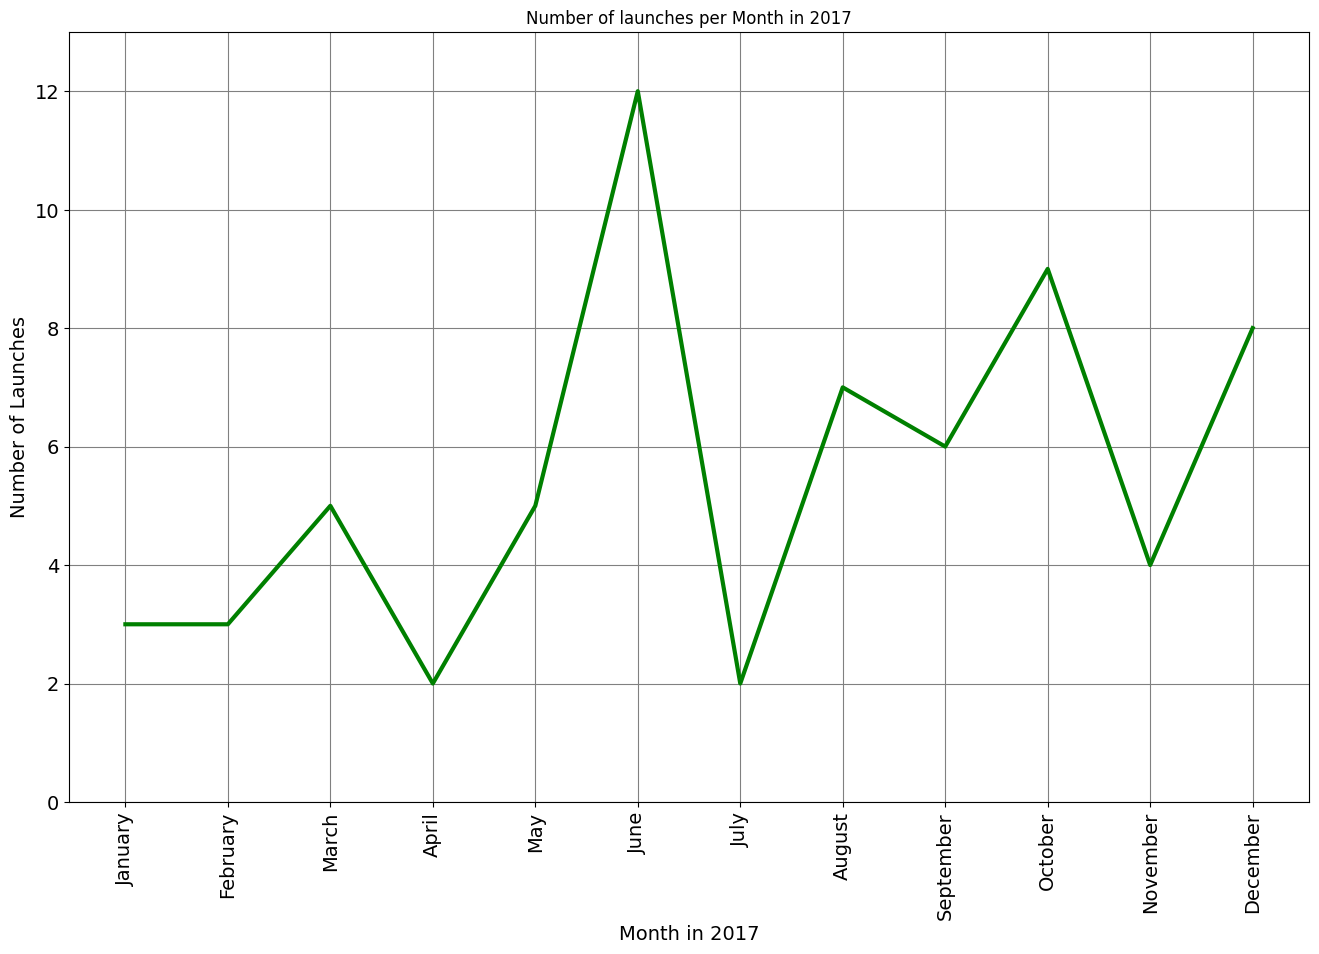

In [110]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)

plt.xlabel('Month in 2017', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)
plt.ylim(0, 13)
plt.title('Number of launches per Month in 2017')
plt.grid(color='grey')
plt.plot(launches2017.Month, launches2017.Detail, linewidth=3, c='green')

In [111]:
launches2017_country = df2017.groupby(['Month','Country'], as_index=False).agg({'Detail': pd.Series.nunique})
launches2017_country['Month'] = launches2017_country['Month'].dt.strftime('%B')
launches2017_country.head(3)

,Month,Country,Detail
0,January,China,1
1,January,USA,2
2,February,France,1


In [112]:
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

In [113]:
plt.figure(figsize=(16, 10))
line = px.line(launches2017_country, x="Month", y="Detail", color='Country', hover_name='Country', title='Number of launches per Country in 2017')
line.update_xaxes(categoryorder='array', categoryarray=month_order)
line.update_layout(xaxis_title='Month', yaxis_title='Number of Launches')
line.show()

<Figure size 1600x1000 with 0 Axes>

We have constructed chars for the number of launches, both globally and by individual countries, for the years 2017 and 2020. In general, the most popular months for launches appear to be June and July, while April tends to be less popular. However, when examining the data with a country-specific breakdown, distinct trends emerge. This is expected, as the weather conditions for each season vary among different countries.

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

<ipython-input-114-29a799eecd38>:2: FutureWarning:

Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')



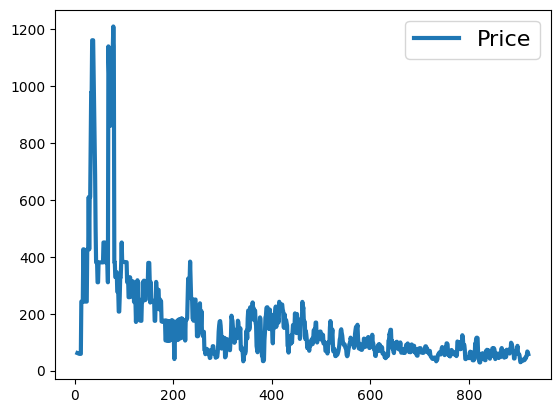

In [114]:
price_mean = clean_df.groupby('Date', as_index=False).agg({'Price': pd.Series.mean})
roll_price_mean = price_mean.rolling(window=6).mean()
for column in roll_price_mean:
  plt.plot(roll_price_mean.index, roll_price_mean.Price, linewidth = 3, label = roll_price_mean.Price.name)
  plt.legend(fontsize = 16)

In [115]:
price_mean_year = clean_df.groupby('Year', as_index=False).agg({'Price': pd.Series.mean})
price_mean_year.dtypes

Year       int64
Price    float64
dtype: object

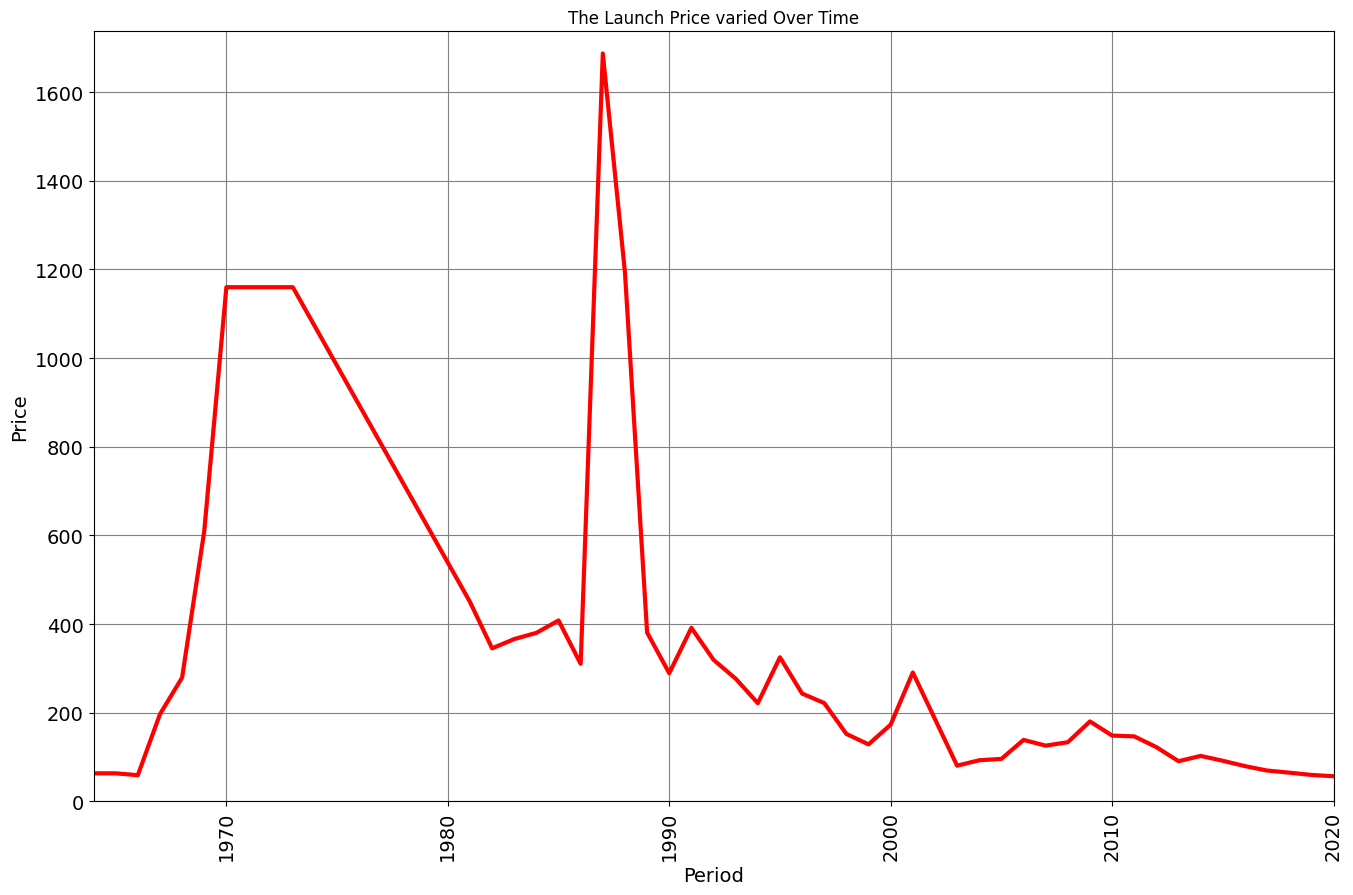

In [116]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.xlabel('Period', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xlim(min(price_mean_year.Year), max(price_mean_year.Year))
plt.ylim(0, max(price_mean_year.Price)+50)
plt.title('The Launch Price varied Over Time')
plt.grid(color='grey')
plt.plot(price_mean_year.Year, price_mean_year.Price, linewidth=3, c='red')

In [117]:
price_mean_year_company = clean_df.groupby(['Year', 'Country'], as_index=False).agg({'Price': pd.Series.mean})
price_mean_year_company.head(3)

,Year,Country,Price
0,1964,USA,63.23
1,1965,USA,63.23
2,1966,USA,59.00


In [118]:
plt.figure(figsize=(16, 10))
line = px.line(price_mean_year_company, x="Year", y="Price", color='Country', hover_name='Country', title='The Launch Price varied Year-by-Year per Country')
line.update_layout(xaxis_title='Period', yaxis_title='Price')
line.show()

<Figure size 1600x1000 with 0 Axes>

If we look at the overall price trend, prices have consistently been decreasing. However, when we examine the price dynamics with a country-specific breakdown, we can observe a decreasing price trend only in certain countries. In all other cases, prices remain relatively stable.

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [119]:
top=clean_df.groupby('Organisation', as_index=False)['Detail'].count().sort_values('Detail', ascending=False)
top=top.head(10)

In [120]:
top_10 = clean_df[clean_df['Organisation'].isin(top.Organisation)]
top_10_year = top_10.groupby(['Organisation', 'Year'], as_index=False)['Detail'].count().sort_values('Year')
top_10_year.head(4)

,Organisation,Year,Detail
180,US Air Force,1964,2
181,US Air Force,1965,2
182,US Air Force,1966,3
183,US Air Force,1967,7


In [121]:
plt.figure(figsize=(16, 10))
line = px.line(top_10_year, x="Year", y="Detail", color='Organisation', hover_name='Organisation', title='The Number of Launches over Time by the Top 10 Organisations')
line.update_layout(xaxis_title='Period', yaxis_title='Number of launches')
line.show()

<Figure size 1600x1000 with 0 Axes>

At first, we selected the top 10 organizations based on the total number of launches. Then, we filtered all the data for these 10 organizations and calculated the number of launches for each year. From the chart, it is evident that the number of launches is steadily increasing over time, with the highest number of launches achieved by the organization CASC. Now, we will select the top 10 organizations with the highest number of successful launches and examine the trends.

In [122]:
clean_df.head(3)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Mission_Type,Country,Country_Code,Year,Month
4020,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1964-09-01,Titan IIIA | Transtage 1,StatusRetired,63.23,Failure,All Others,USA,USA,1964,1964-09
4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1964-12-10,Titan IIIA | Transtage 2,StatusRetired,63.23,Success,Success,USA,USA,1964,1964-12
3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1965-02-11,Titan IIIA | LES 1,StatusRetired,63.23,Success,Success,USA,USA,1965,1965-02


In [123]:
successful_org = clean_df[clean_df.Mission_Status=='Success'].groupby('Organisation', as_index=False)['Detail'].count().sort_values('Detail', ascending=False)
successful_org10 = successful_org.head(10)

In [124]:
suc_top_10 = clean_df.loc[(clean_df['Organisation'].isin(top.Organisation))&(clean_df.Mission_Status=='Success')]
suc_top_10 = suc_top_10.groupby(['Organisation', 'Year'], as_index=False)['Detail'].count().sort_values('Year')
suc_top_10.head(4)

,Organisation,Year,Detail
171,US Air Force,1964,1
172,US Air Force,1965,2
173,US Air Force,1966,3
83,NASA,1967,1


In [125]:
plt.figure(figsize=(16, 10))
line = px.line(suc_top_10, x="Year", y="Detail", color='Organisation', hover_name='Organisation', title='The Number of Launches over Time by the Top 10 Organisations with Successful mission')
line.update_layout(xaxis_title='Period', yaxis_title='Number of launches')
line.show()

<Figure size 1600x1000 with 0 Axes>

The dynamics have changed slightly, but the leaders have remained the same. The organization CASC has the highest number of successful launches in 2018.

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [126]:
cold_war = clean_df[clean_df.Year < 1992]
cold_war = cold_war.query("Country == 'USA' | Country == 'Kazakhstan'")
cold_war.shape

(92, 12)

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [127]:
cold_war_missions = cold_war.groupby(['Country', 'Organisation', 'Mission_Status'], as_index=False).agg({'Mission_Type': pd.Series.count})

In [128]:
mission_fig = px.sunburst(cold_war_missions,
                      path=['Country', 'Organisation', 'Mission_Status'],
                      values='Mission_Type',
                      title='Missions USA vs USSR')
mission_fig.show()

As seen from the pie chart, during the Cold War, the USA conducted the highest number of launches, while the USSR only conducted 2, which is just 2% of the total number of launches.

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [129]:
cold_war_launches = cold_war.groupby(['Country', 'Year'], as_index=False)['Detail'].count().sort_values('Year')

In [130]:
plt.figure(figsize=(16, 10))
line = px.line(cold_war_launches, x="Year", y="Detail", color='Country', hover_name='Country', title='The Number of Launches Year-On-Year by the Two Superpowers')
line.update_layout(xaxis_title='Period', yaxis_title='Number of launches')
line.show()

<Figure size 1600x1000 with 0 Axes>

In [131]:
cold_war_launches_bar = px.bar(cold_war_launches,
                 x='Year',
                 y='Detail',
                 color='Country',
                 title='The Number of Launches Year-On-Year by the Two Superpowers')

cold_war_launches_bar.update_layout(xaxis_title='Period',
                    yaxis_title='The Number of Launches')
cold_war_launches_bar.show()

This charts once again illustrates that throughout the war, the USA continued its launches and developments in the field of space, while the USSR conducted only 2 launches. There was a period from 1974 to 1980 when neither the USSR nor the USA conducted any launches.

## Chart the Total Number of Mission Failures Year on Year.

In [132]:
cold_war.head(5)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Mission_Type,Country,Country_Code,Year,Month
4020,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1964-09-01,Titan IIIA | Transtage 1,StatusRetired,63.23,Failure,All Others,USA,USA,1964,1964-09
4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1964-12-10,Titan IIIA | Transtage 2,StatusRetired,63.23,Success,Success,USA,USA,1964,1964-12
3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1965-02-11,Titan IIIA | LES 1,StatusRetired,63.23,Success,Success,USA,USA,1965,1965-02
3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1965-05-06,Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success,Success,USA,USA,1965,1965-05
3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA",1966-07-29,Titan IIIB | KH-8,StatusRetired,59.00,Success,Success,USA,USA,1966,1966-07


In [133]:
cold_war_failures = cold_war[cold_war.Mission_Type=='All Others'].groupby(['Country', 'Year'], as_index=False)['Detail'].count().sort_values('Year')

In [134]:
plt.figure(figsize=(16, 10))
line = px.line(cold_war_failures, x="Year", y="Detail", color='Country', hover_name='Country', title='The Number of Failures Year-On-Year by the Two Superpowers')
line.update_layout(xaxis_title='Period', yaxis_title='Number of failures')
line.show()

<Figure size 1600x1000 with 0 Axes>

In [135]:
cold_war_failures_bar = px.bar(cold_war_failures,
                 x='Year',
                 y='Detail',
                 color='Country',
                 title='The Number of Failures Year-On-Year by the Two Superpowers')

cold_war_failures_bar.update_layout(xaxis_title='Period',
                    yaxis_title='The Number of Launches')
cold_war_failures_bar.show()

At the same time, the USA experienced a few failures and unsuccessful attempts, whereas the USSR had no unsuccessful attempts. As the saying goes, "Who does not work, does not make mistakes."


# Now let's take a look at the overall trend of unsuccessful launches.

In [136]:
failures = clean_df[clean_df.Mission_Type=='All Others'].groupby('Year', as_index=False)['Detail'].count().sort_values('Year')

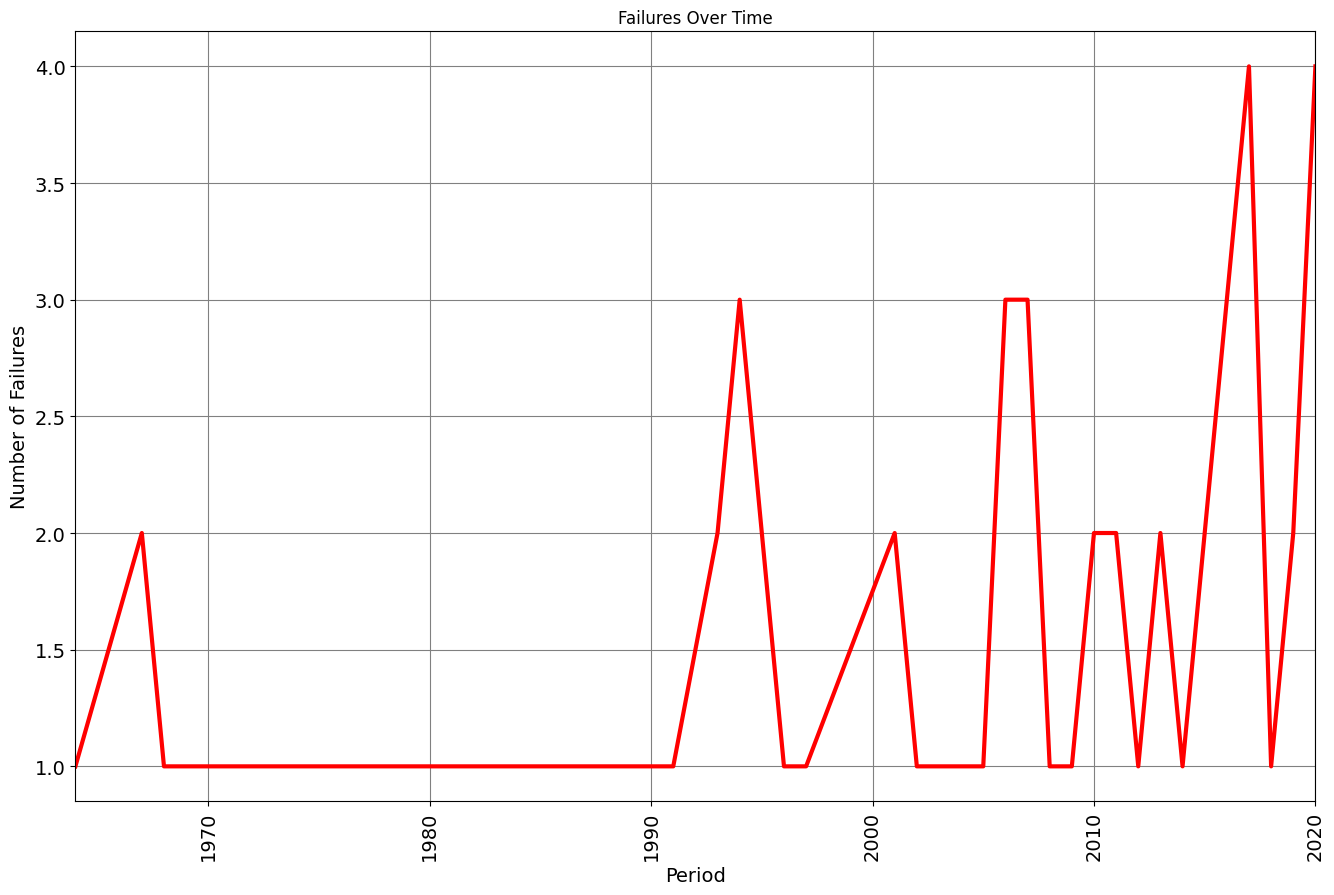

In [137]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.xlabel('Period', fontsize=14)
plt.ylabel('Number of Failures', fontsize=14)
plt.xlim(min(failures.Year), max(failures.Year))
plt.title('Failures Over Time')
plt.grid(color='grey')
plt.plot(failures.Year, failures.Detail, linewidth=3, c='red')

In [138]:
roll_failures = failures.rolling(window=10).mean()

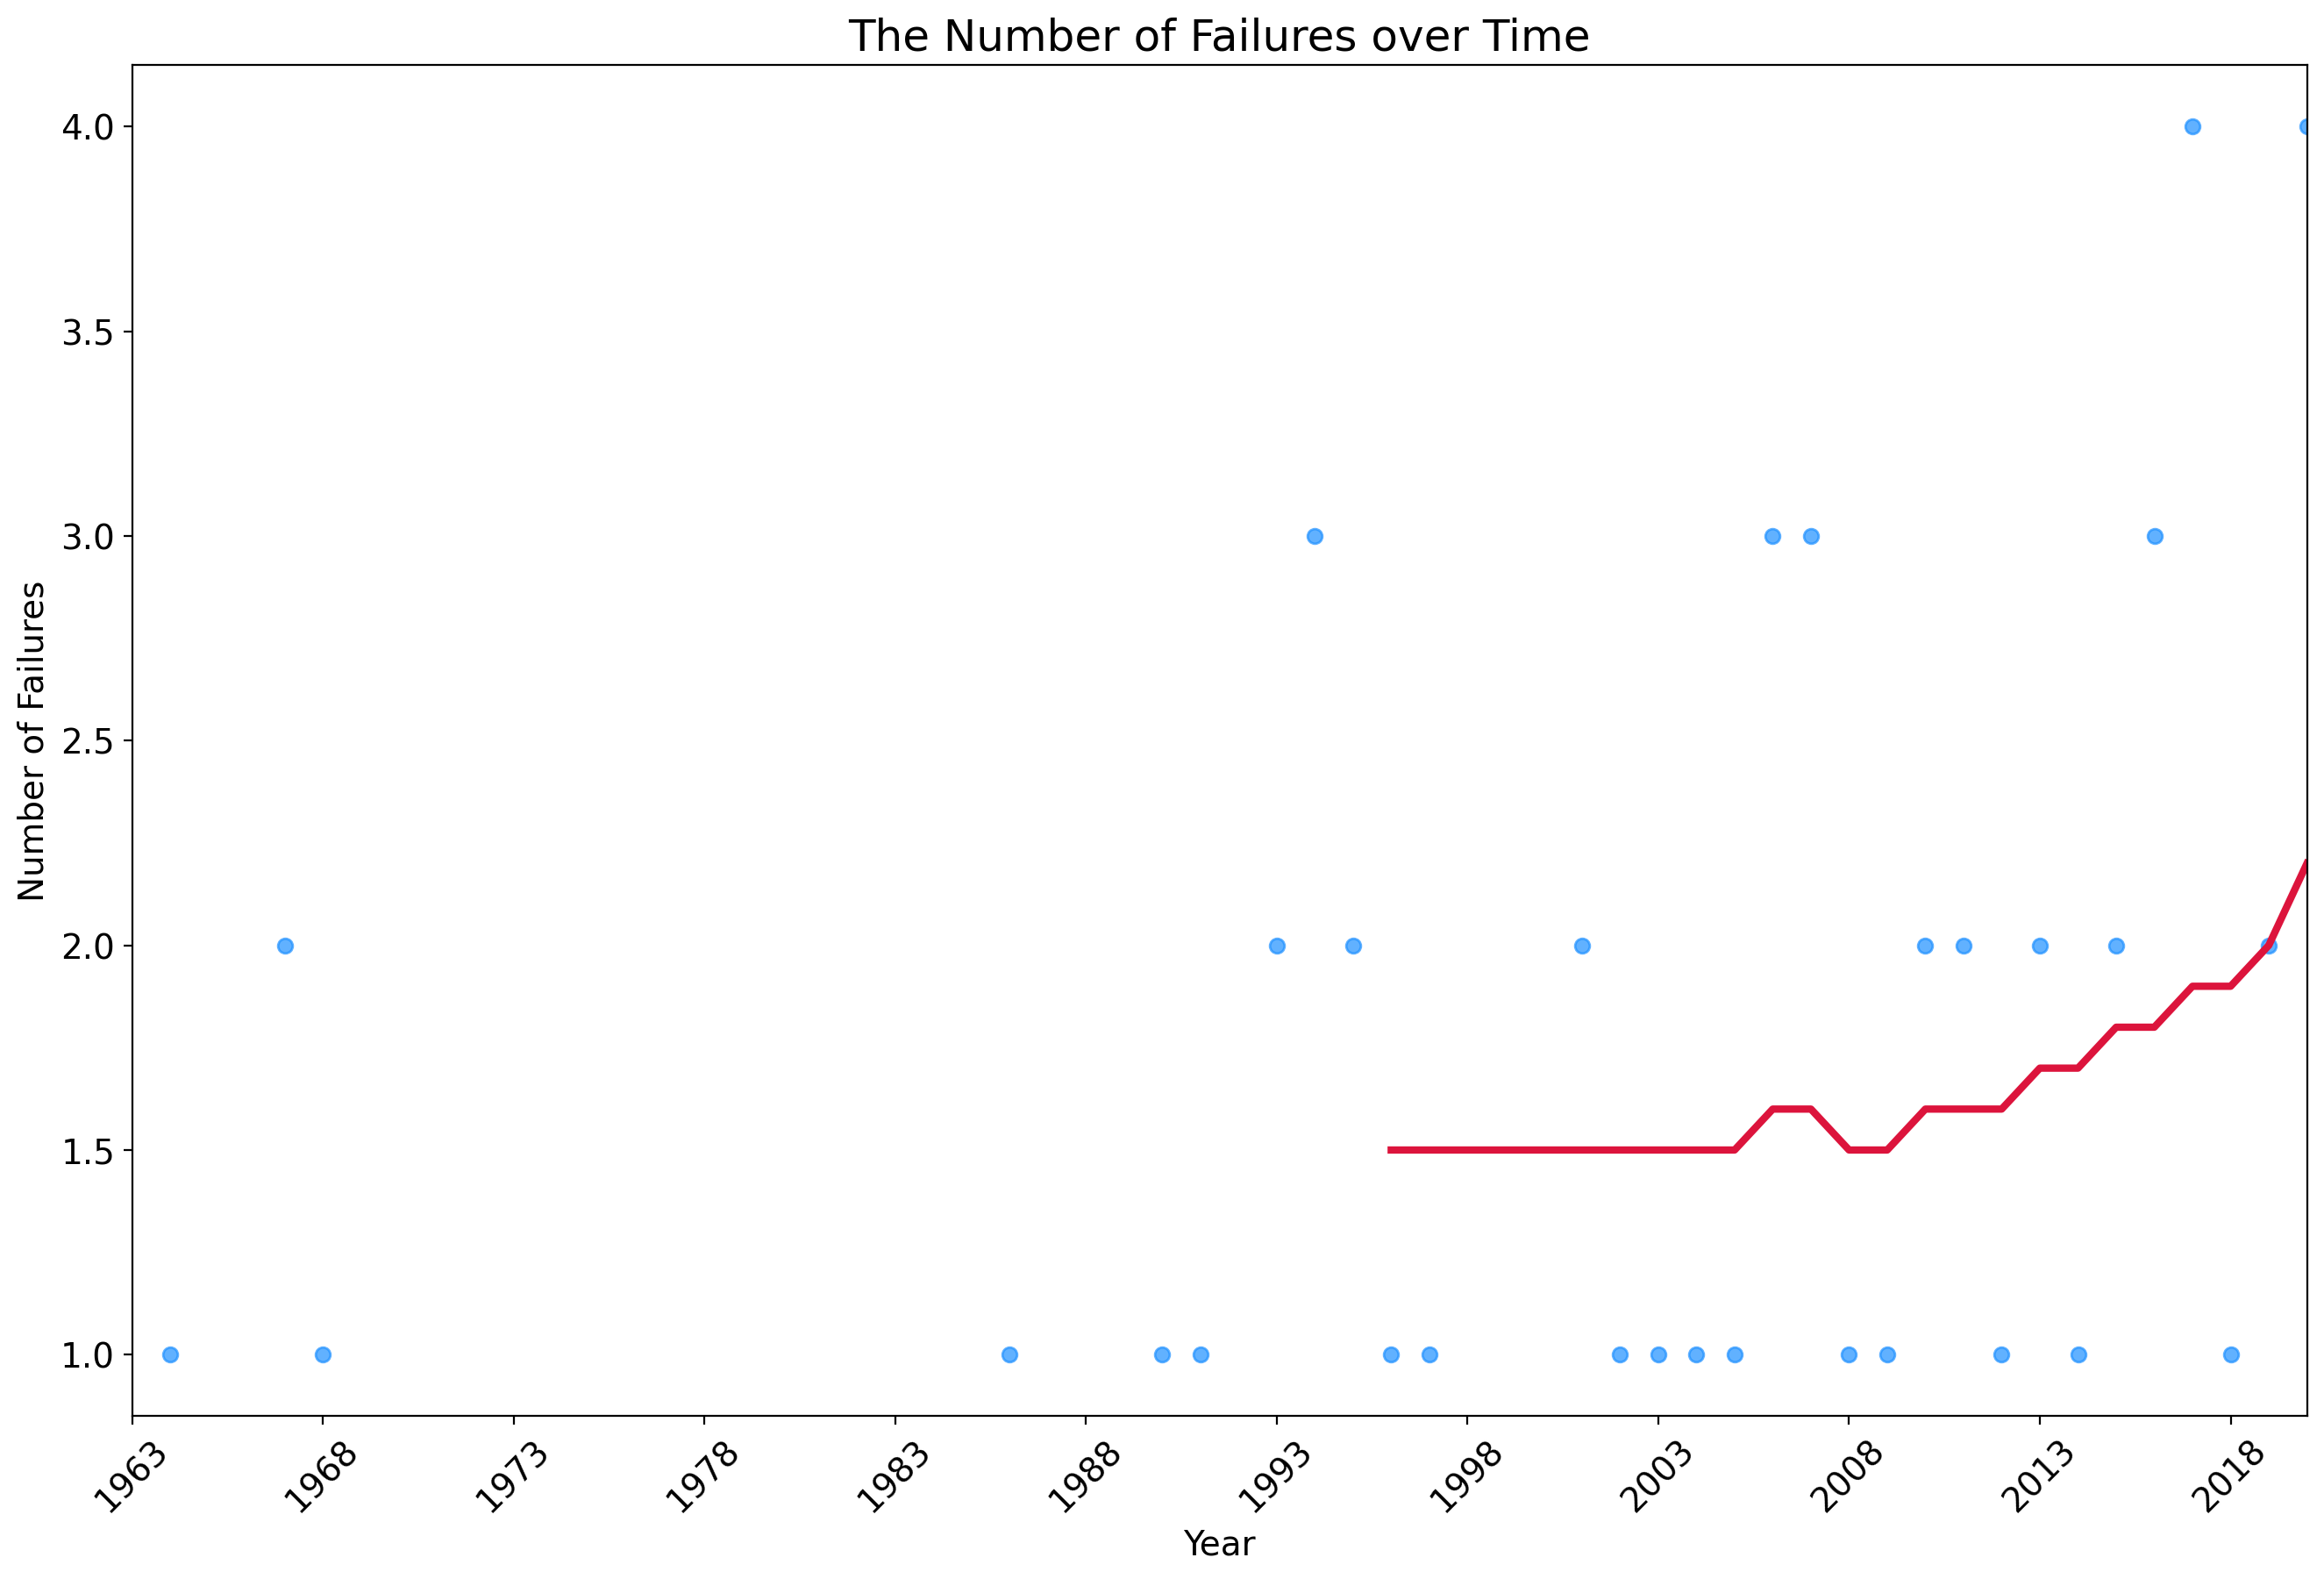

In [139]:
plt.figure(figsize=(16,10),  dpi=200)

plt.title('The Number of Failures over Time', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1963, 2020, step=5),
           fontsize=14,
           rotation=45)

ax = plt.gca() # get current axis
ax.set_xlim(1963, 2020)

plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Failures', fontsize=14)
ax.plot(failures.Year, roll_failures.Detail, c='crimson', linewidth=3,)
ax.scatter(failures.Year, failures.Detail,  c='dodgerblue', alpha=0.7)

plt.show()

In [140]:
failures_country = clean_df[clean_df.Mission_Type=='All Others'].groupby(['Country', 'Year'], as_index=False)['Detail'].count().sort_values('Year')

In [141]:
plt.figure(figsize=(16, 10))
line = px.line(failures_country, x="Year", y="Detail", color='Country', hover_name='Country', title='The Number of Failures Over the time by Country')
line.update_layout(xaxis_title='Period', yaxis_title='Number of launches')
line.show()

<Figure size 1600x1000 with 0 Axes>

If we look at the overall trend across all countries and organizations, the total number of unsuccessful launches slightly increases. However, when examining it by country, it remains relatively constant. Now let's take a look at the percentage of unsuccessful launches.

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [142]:
all_launches = clean_df.Mission_Status.value_counts()
fig = px.pie(labels=all_launches.index, values=all_launches.values, names=all_launches.index, title='Mission Types')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:138: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [143]:
mission_by_year= clean_df.groupby(['Year', 'Mission_Type'], as_index=False)['Detail'].count().sort_values(['Year','Detail'])
mission_by_year.head(3)

,Year,Mission_Type,Detail
0,1964,All Others,1
1,1964,Success,1
2,1965,Success,2


In [144]:
total_mission_by_year = clean_df.groupby('Year', as_index=False)['Detail'].count().sort_values('Year')
total_mission_by_year = pd.DataFrame({'Year': total_mission_by_year.Year, 'Total_missions_per_year': total_mission_by_year.Detail})
total_mission_by_year.head(3)

,Year,Total_missions_per_year
0,1964,2
1,1965,2
2,1966,3


In [145]:
status_mission_by_year = pd.merge(mission_by_year, total_mission_by_year, on = 'Year')
status_mission_by_year.rename(columns = {'Detail': 'Number_of_launches'}, inplace=True)
status_mission_by_year['Percentage'] = status_mission_by_year.Number_of_launches/status_mission_by_year.Total_missions_per_year
status_mission_by_year.head(3)

,Year,Mission_Type,Number_of_launches,Total_missions_per_year,Percentage
0,1964,All Others,1,2,0.50
1,1964,Success,1,2,0.50
2,1965,Success,2,2,1.00


In [146]:
status_mission_by_year_bar = px.bar(
    status_mission_by_year,
    x='Year',
    y='Percentage',
    color='Mission_Type',
    title='The Percentage of Mission Status over Time',
    labels={'Percentage': 'Percentage of Mission Status'}
)

status_mission_by_year_bar.update_traces(
    hovertemplate='%{y:.2%}',  # Format the hover text as a percentage
    textposition='inside',
    texttemplate='%{y:.2%}',  # Format the text labels as percentages
    textfont_size=16
)

status_mission_by_year_bar.update_layout(
    xaxis_title='Period',
    yaxis_title='Percentage of Mission Status'
)

status_mission_by_year_bar.show()

In [147]:
failures_perc_by_year = status_mission_by_year[status_mission_by_year.Mission_Type=='All Others']
failures_perc_by_year.head(5)

,Year,Mission_Type,Number_of_launches,Total_missions_per_year,Percentage
0,1964,All Others,1,2,0.50
4,1967,All Others,2,8,0.25
6,1968,All Others,1,10,0.10
18,1986,All Others,1,3,0.33
23,1990,All Others,1,11,0.09


In [148]:
roll_failures_perc_by_year = failures_perc_by_year.rolling(window=5).mean()

<ipython-input-148-81f794ac2d44>:1: FutureWarning:

Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Mission_Type'], dtype='object')



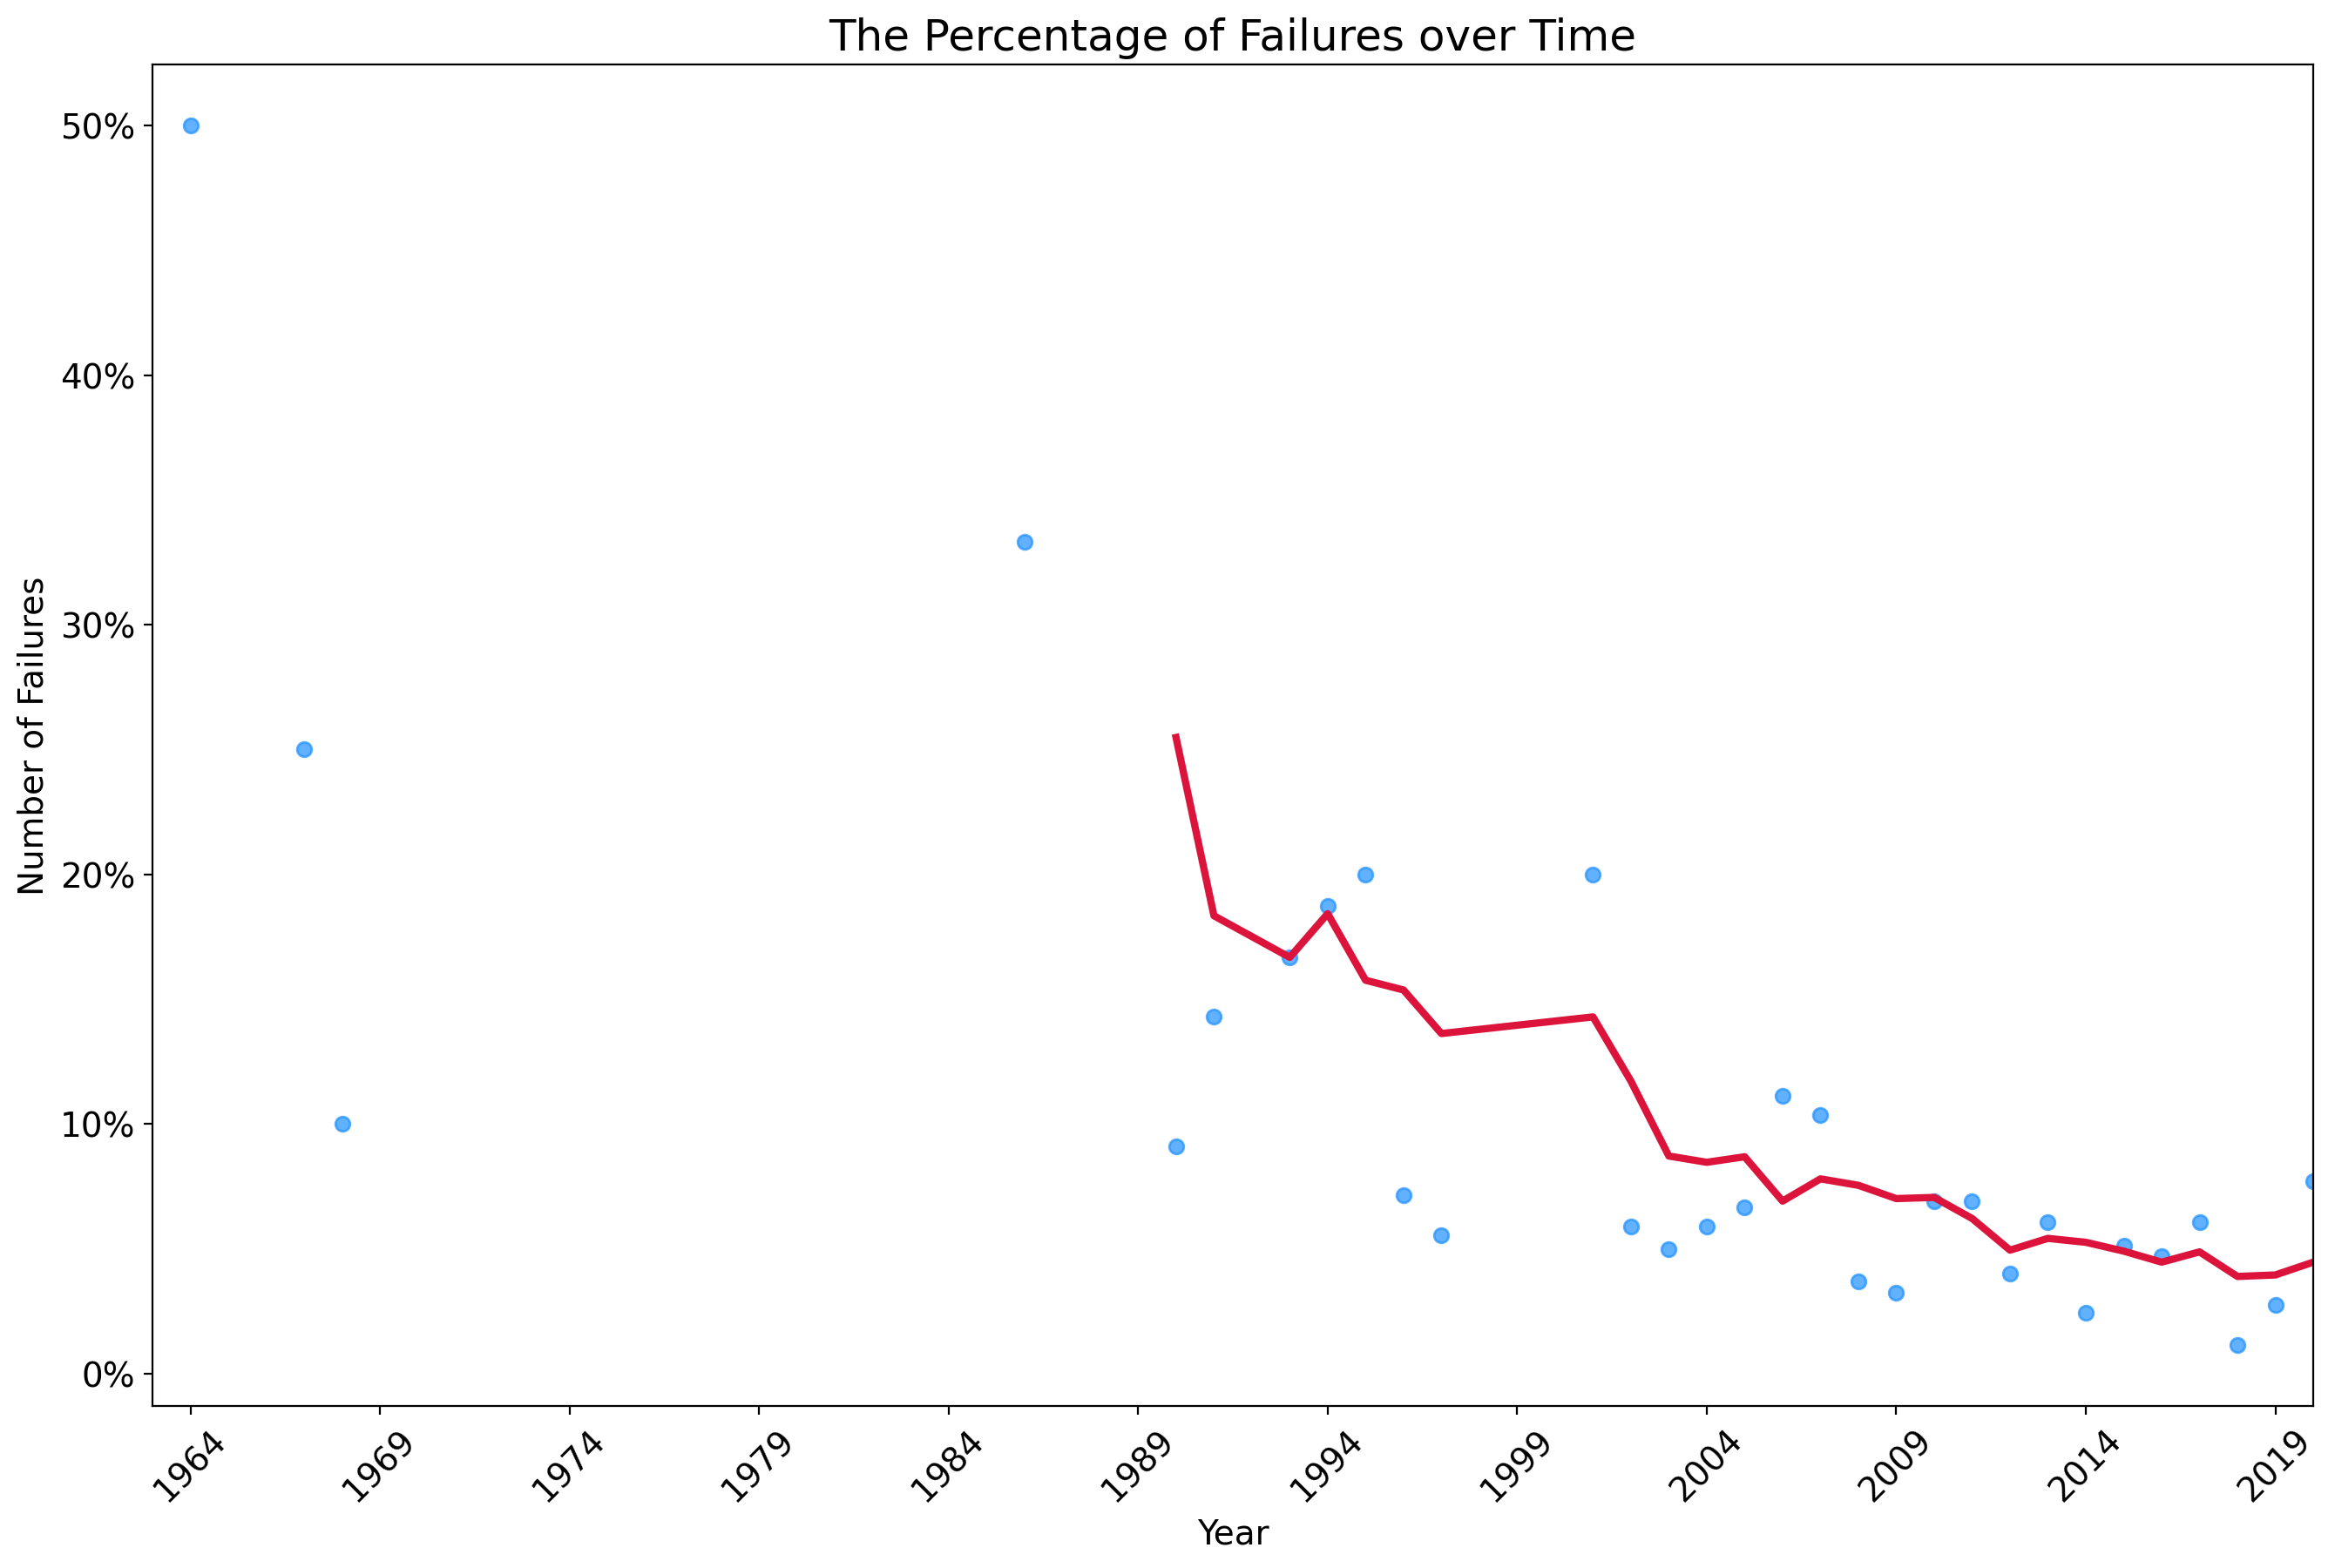

In [149]:
plt.figure(figsize=(16,10),  dpi=200)

plt.title('The Percentage of Failures over Time', fontsize=18)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=14, labels=[f"{int(val*100)}%" for val in np.arange(0, 1.1, 0.1)])
plt.xticks(ticks=np.arange(1964, 2020, step=5),
           fontsize=14,
           rotation=45)

ax = plt.gca() # get current axis
ax.set_xlim(1963, 2020)

plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Failures', fontsize=14)
ax.plot(failures_perc_by_year.Year, roll_failures_perc_by_year.Percentage, c='crimson', linewidth=3,)
ax.scatter(failures_perc_by_year.Year, failures_perc_by_year.Percentage,  c='dodgerblue', alpha=0.7)

plt.show()

We have created a comprehensive pie chart, histogram, and a year-wise breakdown graph. These visuals clearly indicate that the overall percentage of failed launches is very small - 5.6%, and over the years, the number of failed launches has decreased. This implies that progress is not stagnant, and organizations are learning from past mistakes and developing new technologies.

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [150]:
yearly_launch_counts = clean_df.groupby(['Year', 'Country'])['Detail'].count().reset_index()
idx = yearly_launch_counts.groupby('Year')['Detail'].idxmax()
launches_by_lead_country = yearly_launch_counts.loc[idx]
launches_by_lead_country.head(10)

,Year,Country,Detail
0,1964,USA,2
1,1965,USA,2
2,1966,USA,3
3,1967,USA,8
4,1968,USA,10
5,1969,USA,8
6,1970,USA,1
7,1971,USA,2
8,1972,USA,2
9,1973,USA,1


In [151]:
number_launches_bar = px.bar(
    launches_by_lead_country,
    x='Year',
    y='Detail',
    color='Country',
    title='The Lead Country in terms of Total Number of Launches',
)

number_launches_bar.update_layout(
    xaxis_title='Period',
    yaxis_title='The Number of Missions'
)

number_launches_bar.show()

In [152]:
success_launches_by_country = clean_df.groupby(['Year', 'Country', 'Mission_Type'], as_index=False)['Detail'].count()
success_launches_by_country = success_launches_by_country[success_launches_by_country.Mission_Type=='Success']

In [153]:
idx = success_launches_by_country.groupby('Year')['Detail'].idxmax()
success_launches_by_lead_country = success_launches_by_country.loc[idx]
success_launches_by_lead_country.head(10)

,Year,Country,Mission_Type,Detail
1,1964,USA,Success,1
2,1965,USA,Success,2
3,1966,USA,Success,3
5,1967,USA,Success,6
7,1968,USA,Success,9
8,1969,USA,Success,8
9,1970,USA,Success,1
10,1971,USA,Success,2
11,1972,USA,Success,2
12,1973,USA,Success,1


In [154]:
number_launches_bar = px.bar(
    success_launches_by_lead_country,
    x='Year',
    y='Detail',
    color='Country',
    title='The Lead Country in terms of Total Number of Success Launches',
)

number_launches_bar.update_layout(
    xaxis_title='Period',
    yaxis_title='The Number of Missions'
)

number_launches_bar.show()

Based on the constructed bars, the leaders in both the total number of launches and the number of successful launches are the USA and China.

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [155]:
launches_by_company = clean_df.groupby(['Year', 'Organisation', 'Country'], as_index=False)['Detail'].count()

In [156]:
idx = launches_by_company.groupby('Year')['Detail'].idxmax()
launches_by_lead_company = launches_by_company.loc[idx]
launches_by_lead_company.tail(5)

,Year,Organisation,Country,Detail
215,2016,CASC,China,15
234,2017,SpaceX,USA,18
239,2018,CASC,China,27
253,2019,CASC,China,21
266,2020,CASC,China,16


In [157]:
number_launches_bar = px.bar(
    launches_by_lead_company,
    x='Year',
    y='Detail',
    color='Organisation',
    title='The Lead Company in terms of Total Number of Total Launches',
)

number_launches_bar.update_layout(
    xaxis_title='Period',
    yaxis_title='The Number of Missions'
)

number_launches_bar.show()

In [158]:
success_launches_by_company = clean_df.groupby(['Year', 'Organisation', 'Country', 'Mission_Type'], as_index=False)['Detail'].count()
success_launches_by_company = success_launches_by_company[success_launches_by_company.Mission_Type=='Success']
idx = success_launches_by_company.groupby('Year')['Detail'].idxmax()
success_launches_by_lead_company = success_launches_by_company.loc[idx]
success_launches_by_lead_company.head(10)

,Year,Organisation,Country,Mission_Type,Detail
1,1964,US Air Force,USA,Success,1
2,1965,US Air Force,USA,Success,2
3,1966,US Air Force,USA,Success,3
6,1967,US Air Force,USA,Success,5
9,1968,US Air Force,USA,Success,8
10,1969,NASA,USA,Success,4
12,1970,NASA,USA,Success,1
13,1971,NASA,USA,Success,2
14,1972,NASA,USA,Success,2
15,1973,NASA,USA,Success,1


In [161]:
number_launches_bar = px.bar(
    success_launches_by_lead_company,
    x='Year',
    y='Detail',
    color='Organisation',
    title='The Lead Company in terms of Total Number of Success Launches',
)

number_launches_bar.update_layout(
    xaxis_title='Period',
    yaxis_title='The Number of Missions'
)

number_launches_bar.show()

As we can see in the bars, the leaders in the 1970s and 1980s were the US Air Force and NASA, while in 2018, 2019, and 2020, the organization CASC emerged as the leader.